In [60]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from pathlib import Path
from math import floor
from pprint import pprint

In [61]:
#Reading in data and creating a dataframe
file_path = '../output_data/fred_data.csv'
fred_df = pd.read_csv(file_path)
fred_df

,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. 15 Year Fixed Mortgage Rate,Avg. Median Home Sale Price,Avg. Housing Inventory,Avg. Home Price Index,Avg. GDP (Billions of $),Avg. CPI,Avg. Unemployment Rate,Avg. Household Debt to GDP
0,1963,NaN,NaN,18050.00,NaN,NaN,637.45,31.81,5.64,NaN
1,1964,NaN,NaN,18925.00,NaN,NaN,684.46,32.30,5.16,NaN
2,1965,NaN,NaN,20125.00,NaN,NaN,742.29,32.73,4.51,NaN
3,1966,NaN,NaN,21500.00,NaN,NaN,813.41,33.55,3.79,NaN
4,1967,NaN,NaN,22750.00,NaN,NaN,859.96,34.71,3.84,NaN
...,...,...,...,...,...,...,...,...,...,...
56,2019,3.94,3.39,320250.00,1113750.0,209.45,21521.40,263.21,3.68,76.27
57,2020,3.11,2.60,336950.00,838500.0,222.12,21322.95,267.70,8.09,80.03
58,2021,2.96,2.27,396800.00,727000.0,260.06,23594.03,277.25,5.37,77.97
59,2022,5.34,4.58,457475.00,714250.0,298.52,25744.11,294.30,3.64,76.64


In [62]:
#Creating a reduced dataframe with needed variables (15 yr mort rates)
reduced_fred = fred_df[['Year','Avg. 15 Year Fixed Mortgage Rate','Avg. CPI']]
reduced_fred = reduced_fred.dropna()
reduced_fred

,Year,Avg. 15 Year Fixed Mortgage Rate,Avg. CPI
28,1991,8.40,142.12
29,1992,7.94,147.32
30,1993,6.82,152.20
31,1994,7.89,156.50
32,1995,7.48,161.22
33,1996,7.32,165.56
34,1997,7.13,169.51
35,1998,6.59,173.38
36,1999,7.06,176.98
37,2000,7.72,181.29


In [66]:
#Creating a reduced dataframe with needed variables (30 yr mort rates)
reduced_fred2 = fred_df[['Year','Avg. 30 Year Fixed Mortgage Rate','Avg. CPI']]
reduced_fred2 = reduced_fred2.dropna()
reduced_fred2

,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. CPI
8,1971,7.54,42.73
9,1972,7.38,44.04
10,1973,8.04,45.58
11,1974,9.19,49.36
12,1975,9.05,53.91
13,1976,8.87,57.44
14,1977,8.85,61.03
15,1978,9.64,65.48
16,1979,11.20,71.86
17,1980,13.74,80.78


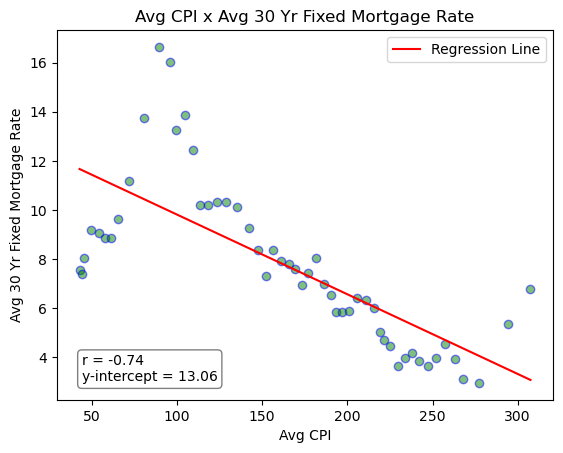

In [64]:
#Calculate linear regression (30 yr mort rates)
linear_regression_plot(reduced_fred2['Avg. CPI'], reduced_fred2['Avg. 30 Year Fixed Mortgage Rate'], "Avg CPI", 'Avg 30 Yr Fixed Mortgage Rate', "Avg CPI x Avg 30 Yr Fixed Mortgage Rate")

# Save the figure
plt.savefig("../output_data/30xCPI.png")

# Show the plot
plt.show()

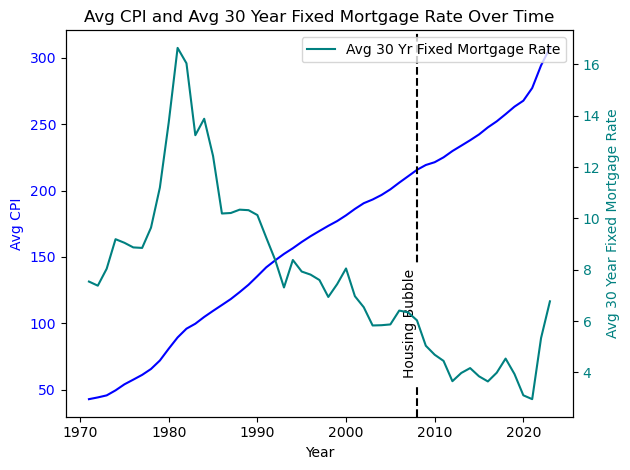

In [81]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot Avg_CPI on the primary y-axis
ax1.plot(reduced_fred2['Year'], reduced_fred2['Avg. CPI'], color='blue', label='Avg CPI')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg CPI', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(reduced_fred2['Year'], reduced_fred2['Avg. 30 Year Fixed Mortgage Rate'], color='teal', label='Avg 30 Yr Fixed Mortgage Rate')
ax2.set_ylabel('Avg 30 Year Fixed Mortgage Rate', color='teal')
ax2.tick_params(axis='y', labelcolor='teal')

# Create vertical line
vertical_line_label = 'Housing Bubble'
vertical_line_year = 2008
ax1.axvline(x=vertical_line_year, color='black', linestyle='--', label=vertical_line_label)
ax1.text(vertical_line_year, ax1.get_ylim()[0] + (ax1.get_ylim()[1] - ax1.get_ylim()[0]) * 0.1, vertical_line_label, color='black', va='bottom', ha='right', backgroundcolor='white', rotation='vertical')

# Title and legend
plt.title('Avg CPI and Avg 30 Year Fixed Mortgage Rate Over Time')
fig.tight_layout()
plt.legend()

# Save the figure
plt.savefig("../output_data/30CPIOT.png")

# Show the plot
plt.show()